In [1]:
import pandas as pd
df2_test = pd.read_csv(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\data\test_edited_25.csv')


## xgboost model

[[2404.556  2034.4481 2817.8901]]


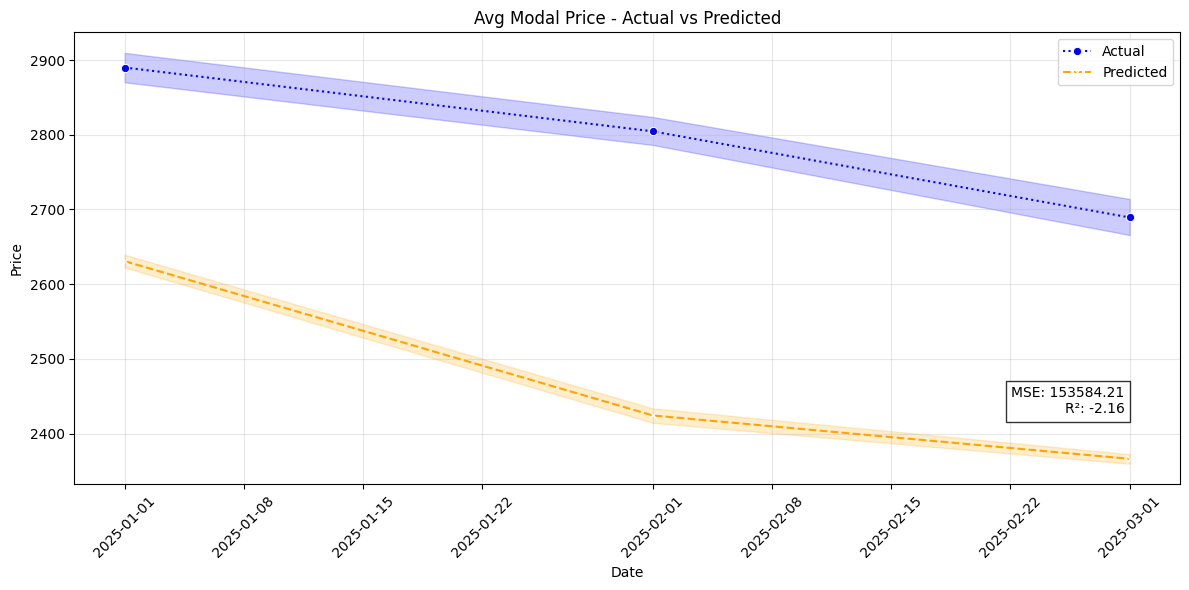

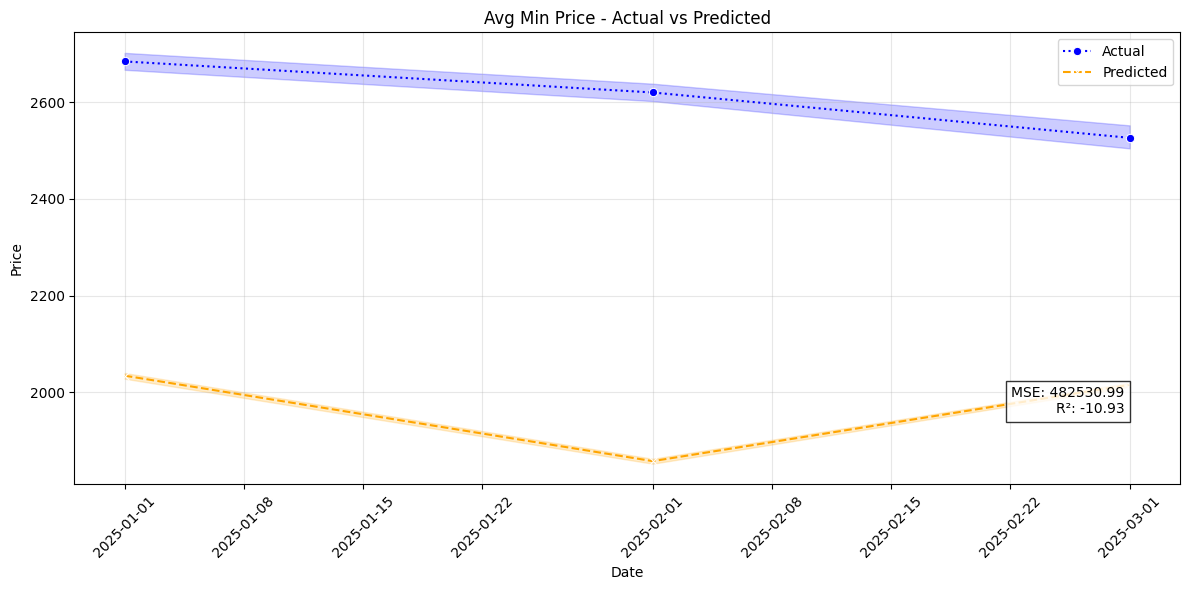

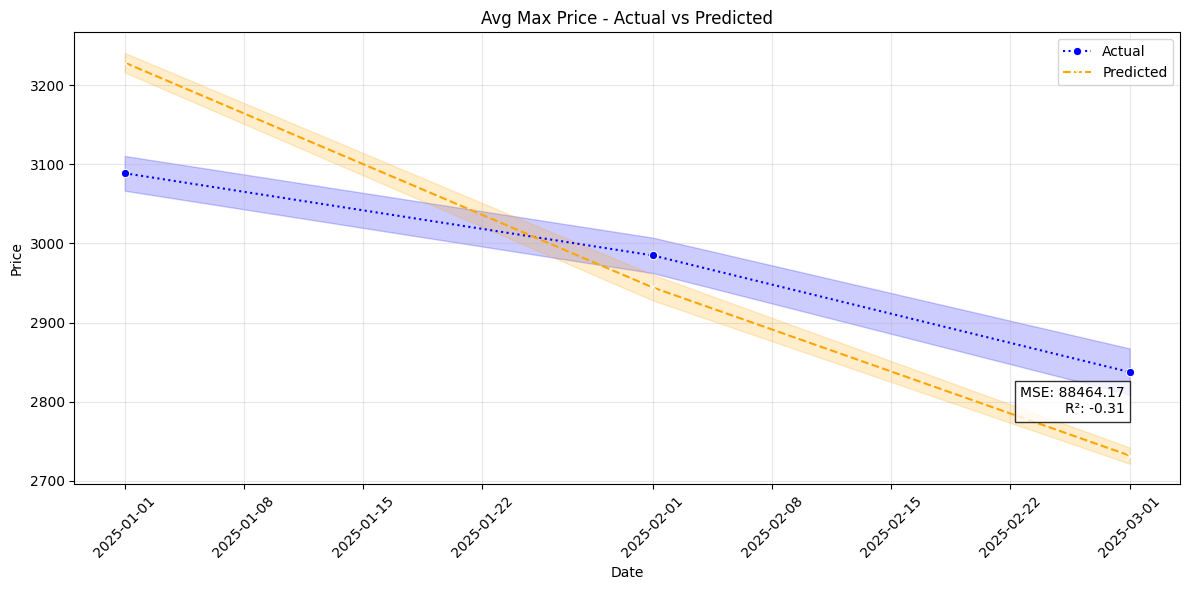

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

X_testt = df2_test[['month', 'year', 'date', 'district_name', 'commodity_name', 'state_name']]
y_testt = df2_test[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

with open(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\notebooks\wheat_price_model_21_24_xg_boost.pkl', 'rb') as file:
    trained_model = pickle.load(file)

predictions2 = trained_model.predict(X_testt)
print(predictions2[1:2])
predictions2_df = pd.DataFrame(predictions2, columns=['pred_modal', 'pred_min', 'pred_max'])

# Ensure the 'datetime' column exists in df2_test
if 'datetime' not in df2_test.columns:
    if 'day' not in df2_test.columns:
        df2_test['day'] = 1  # Add a default day column if missing
    df2_test['datetime'] = pd.to_datetime(df2_test[['year', 'month', 'day']])

# Combine actual and predicted values for comparison
results = pd.concat([df2_test[['datetime']].reset_index(drop=True), 
                     y_testt.reset_index(drop=True), 
                     predictions2_df.reset_index(drop=True)], axis=1)

# Plot comparisons for each target variable
targets = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
predicted_cols = ['pred_modal', 'pred_min', 'pred_max']

for target, pred_col in zip(targets, predicted_cols):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x='datetime', y=target, label='Actual', marker='o', color='blue', linestyle=':')
    sns.lineplot(data=results, x='datetime', y=pred_col, label='Predicted', marker='x', color='orange', linestyle='--')
    # supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.title(f"{target.replace('_', ' ').title()} - Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Calculate and display metrics
    mse = mean_squared_error(results[target], results[pred_col])
    r2 = r2_score(results[target], results[pred_col])
    plt.text(0.95, 0.15, 
             f'MSE: {mse:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, 
             ha='right', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

## light gbm

[[2404.556  2034.4481 2817.8901]]


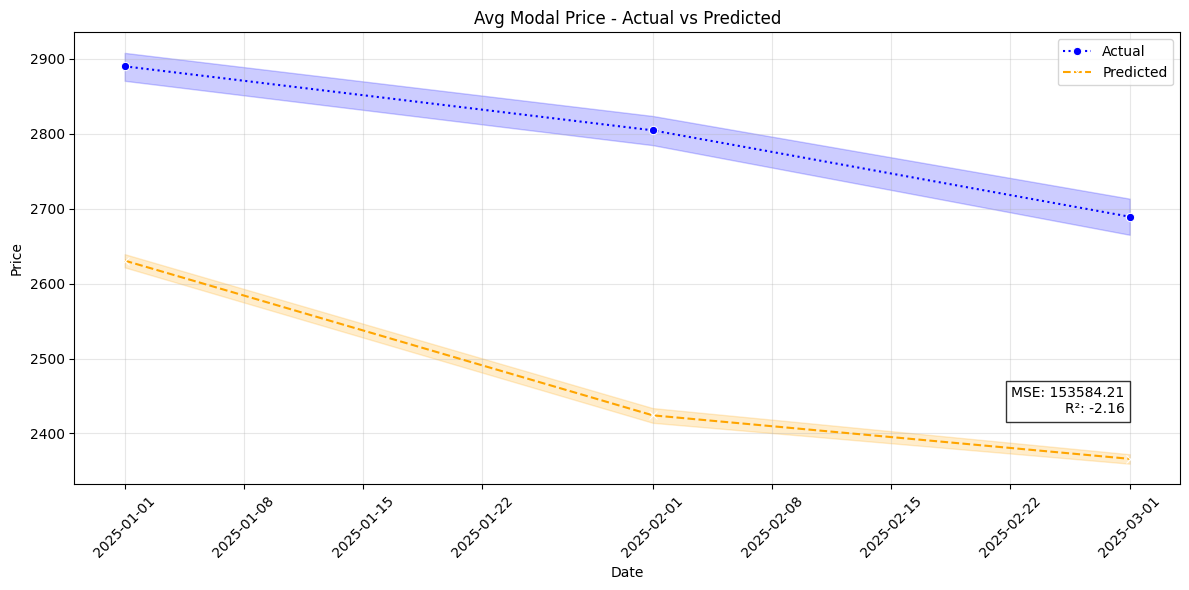

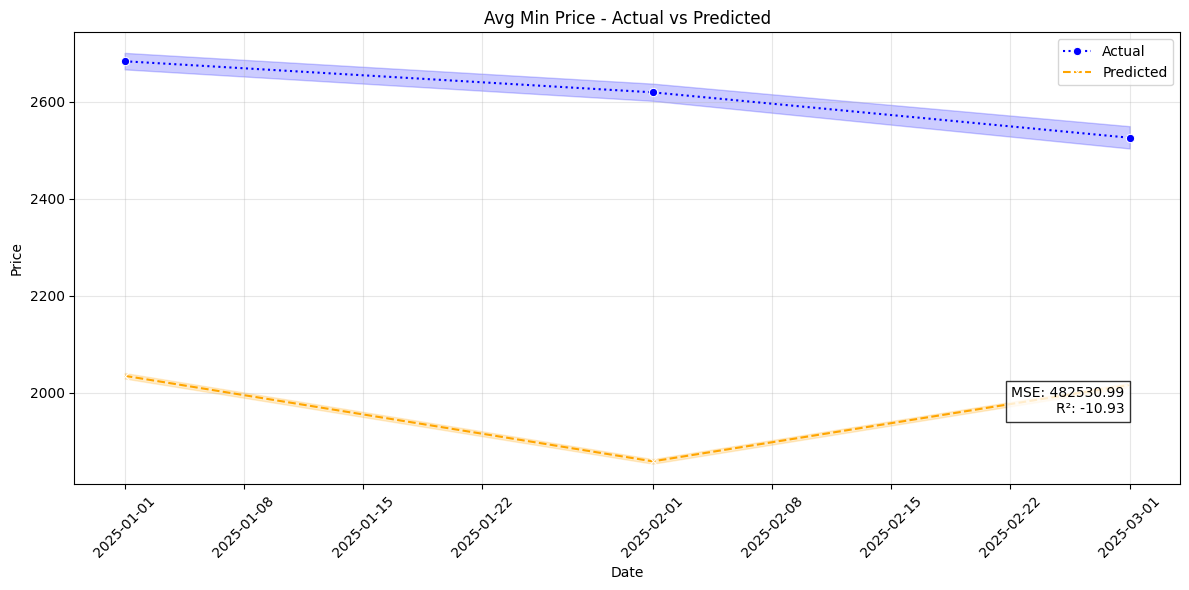

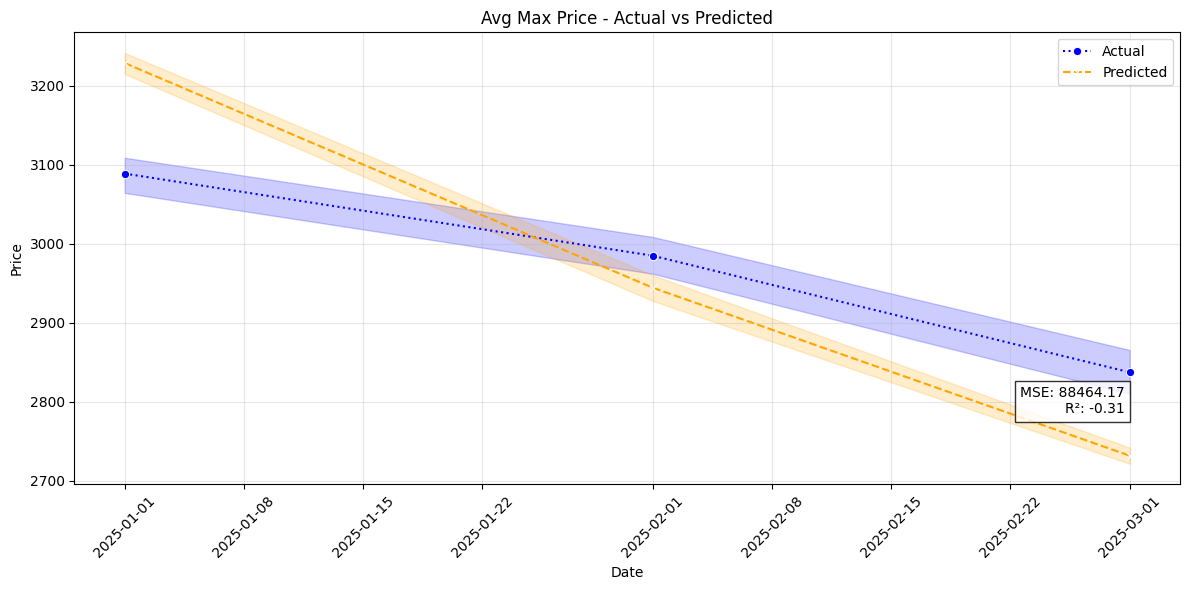

In [3]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

X_testt = df2_test[['month', 'year', 'date', 'district_name', 'commodity_name', 'state_name']]
y_testt = df2_test[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

with open(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\notebooks\wheat_price_model_21_24_light_gbm.pkl', 'rb') as file:
    trained_model = pickle.load(file)

predictions2 = trained_model.predict(X_testt)
print(predictions2[1:2])
predictions2_df = pd.DataFrame(predictions2, columns=['pred_modal', 'pred_min', 'pred_max'])

# Ensure the 'datetime' column exists in df2_test
if 'datetime' not in df2_test.columns:
    if 'day' not in df2_test.columns:
        df2_test['day'] = 1  # Add a default day column if missing
    df2_test['datetime'] = pd.to_datetime(df2_test[['year', 'month', 'day']])

# Combine actual and predicted values for comparison
results = pd.concat([df2_test[['datetime']].reset_index(drop=True), 
                     y_testt.reset_index(drop=True), 
                     predictions2_df.reset_index(drop=True)], axis=1)

# Plot comparisons for each target variable
targets = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
predicted_cols = ['pred_modal', 'pred_min', 'pred_max']

for target, pred_col in zip(targets, predicted_cols):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x='datetime', y=target, label='Actual', marker='o', color='blue', linestyle=':')
    sns.lineplot(data=results, x='datetime', y=pred_col, label='Predicted', marker='x', color='orange', linestyle='--')
    # supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.title(f"{target.replace('_', ' ').title()} - Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Calculate and display metrics
    mse = mean_squared_error(results[target], results[pred_col])
    r2 = r2_score(results[target], results[pred_col])
    plt.text(0.95, 0.15, 
             f'MSE: {mse:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, 
             ha='right', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

## wheat_model_proto_20_23.pkl

[[1966.0057 1777.5519 2156.086 ]]


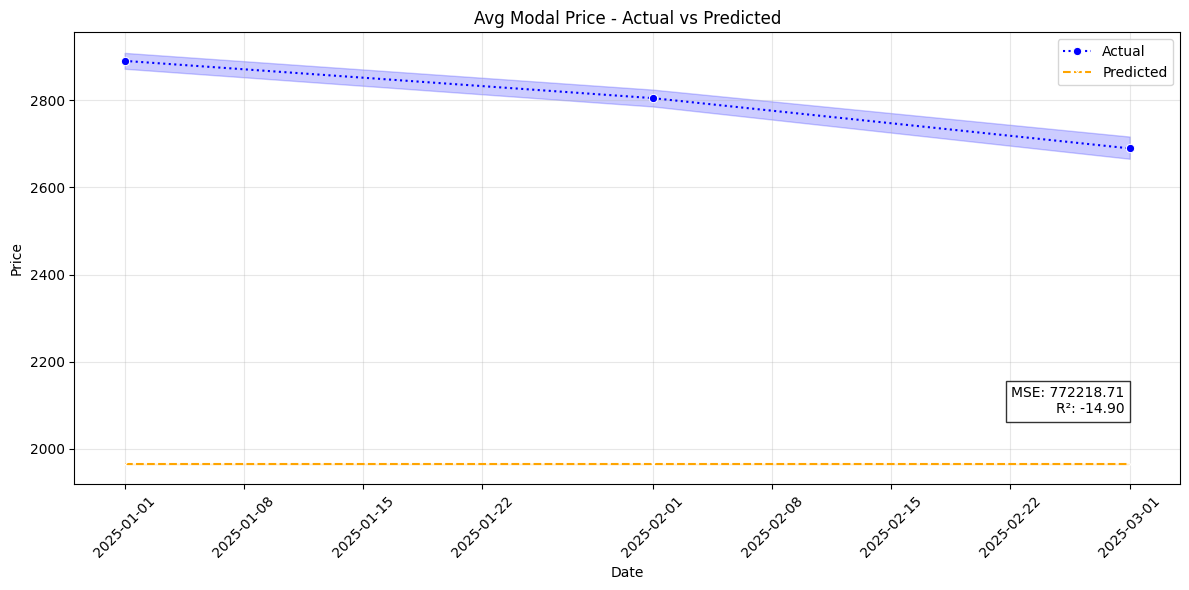

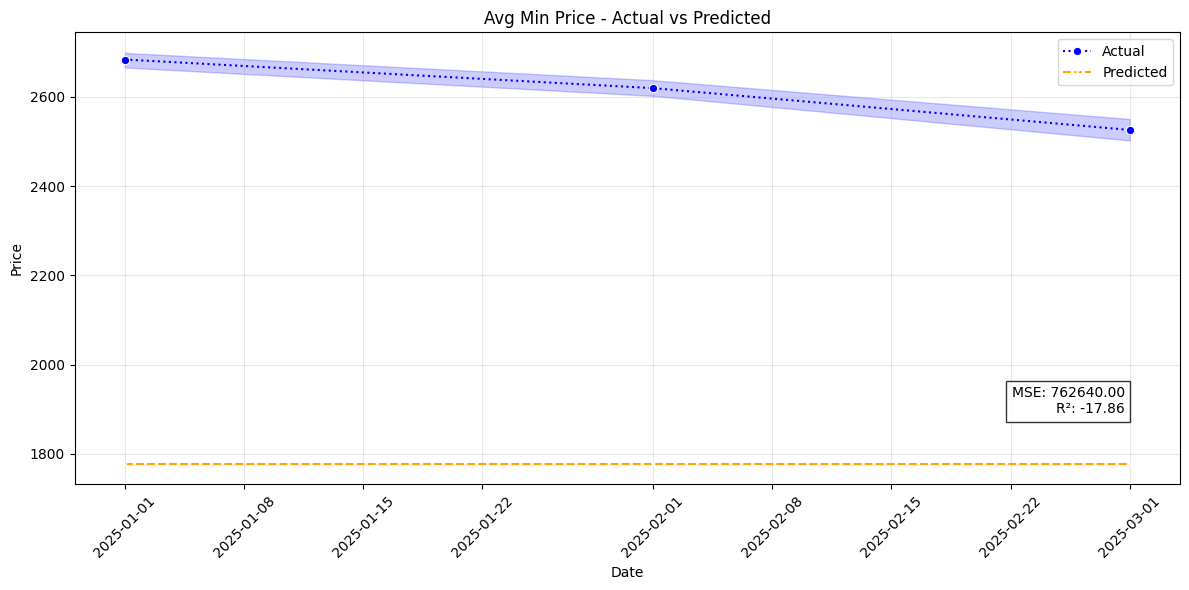

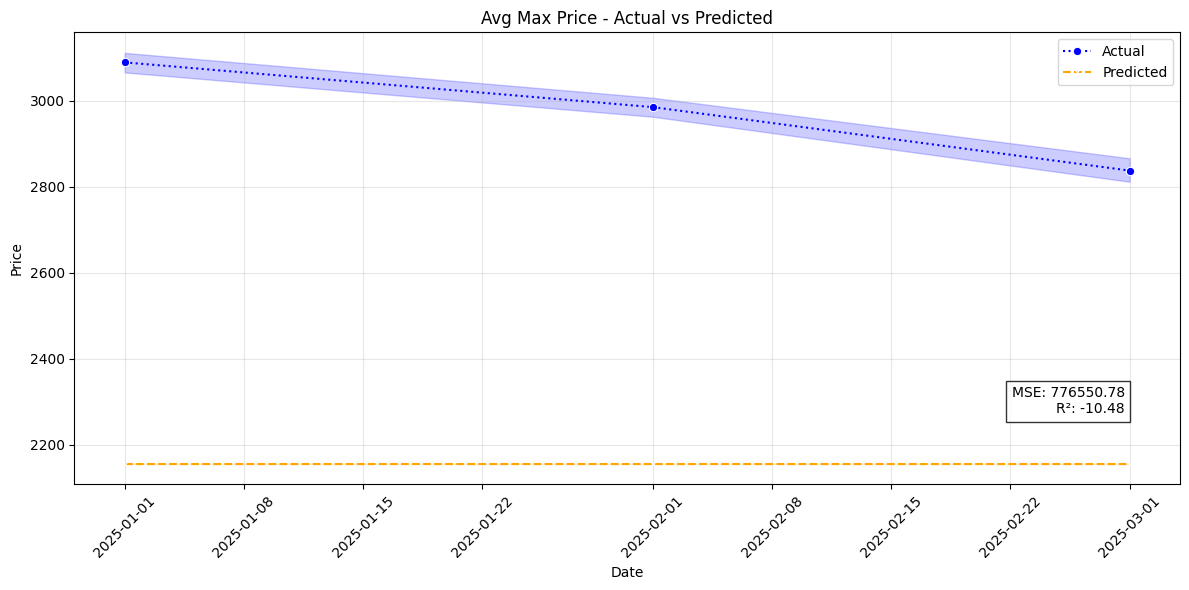

In [6]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

X_testt = df2_test[['month', 'year', 'date', 'district_name', 'commodity_name', 'state_name']]
y_testt = df2_test[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

with open(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\models\wheat_model_proto_20_23.pkl', 'rb') as file:
    trained_model = pickle.load(file)

predictions2 = trained_model.predict(X_testt)
print(predictions2[1:2])
predictions2_df = pd.DataFrame(predictions2, columns=['pred_modal', 'pred_min', 'pred_max'])

# Ensure the 'datetime' column exists in df2_test
if 'datetime' not in df2_test.columns:
    if 'day' not in df2_test.columns:
        df2_test['day'] = 1  # Add a default day column if missing
    df2_test['datetime'] = pd.to_datetime(df2_test[['year', 'month', 'day']])

# Combine actual and predicted values for comparison
results = pd.concat([df2_test[['datetime']].reset_index(drop=True), 
                     y_testt.reset_index(drop=True), 
                     predictions2_df.reset_index(drop=True)], axis=1)

# Plot comparisons for each target variable
targets = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
predicted_cols = ['pred_modal', 'pred_min', 'pred_max']

for target, pred_col in zip(targets, predicted_cols):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x='datetime', y=target, label='Actual', marker='o', color='blue', linestyle=':')
    sns.lineplot(data=results, x='datetime', y=pred_col, label='Predicted', marker='x', color='orange', linestyle='--')
    # supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.title(f"{target.replace('_', ' ').title()} - Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Calculate and display metrics
    mse = mean_squared_error(results[target], results[pred_col])
    r2 = r2_score(results[target], results[pred_col])
    plt.text(0.95, 0.15, 
             f'MSE: {mse:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, 
             ha='right', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.8))
    plt.show()